# Exploration & Plotting

In this notebook I focused changes in demand through time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', parse_dates=['datetime'])

Get basic information about dataset

In [3]:
df.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered',
       u'count'],
      dtype='object')

In [4]:
len(df)

10886

In [5]:
timeseries = df.set_index('datetime')

#All together

Rental demand over time (all / registered / casual)

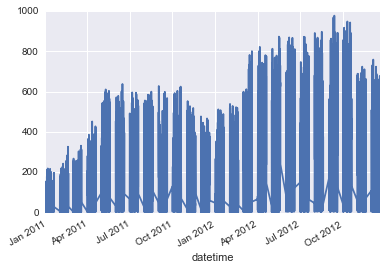

In [6]:
timeseries['count'].plot(ylim=(0, 1000))

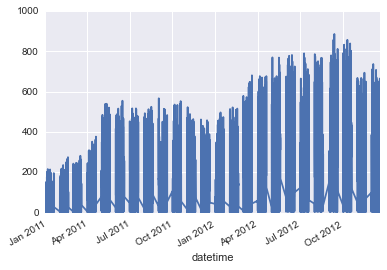

In [7]:
timeseries['registered'].plot(ylim=(0, 1000))

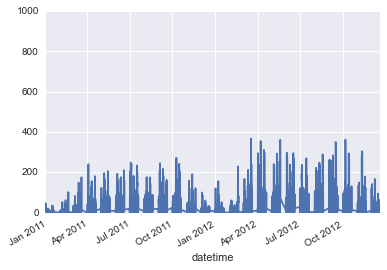

In [8]:
timeseries['casual'].plot(ylim=(0, 1000))

There are holes in dataset. <br>
I think, it's because we will predict those holes.
<br>
There are much fewer causal rents than registered.

Which weeks are empty?

In [9]:
timeseries.resample('W')[(timeseries.resample('W', how='count') == 0).any(axis=1)].index

DatetimeIndex(['2011-01-30', '2011-02-27', '2011-03-27', '2011-05-29',
               '2011-06-26', '2011-07-31', '2011-08-28', '2011-10-30',
               '2011-11-27', '2012-01-29', '2012-02-26', '2012-04-29',
               '2012-05-27', '2012-07-29', '2012-08-26', '2012-09-30',
               '2012-10-28'],
              dtype='datetime64[ns]', name=u'datetime', freq=None)

It looks like end of each month is cut from dataset

# Frequencies

Target variable frequency analisys 

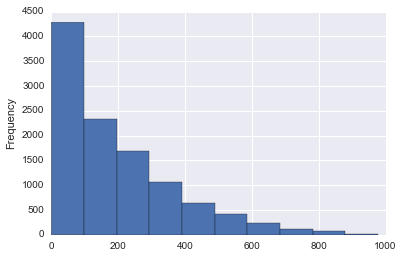

In [10]:
timeseries['count'].plot(kind='hist')

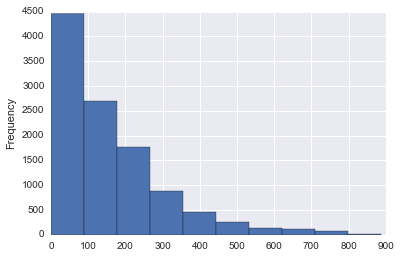

In [11]:
timeseries['registered'].plot(kind='hist')

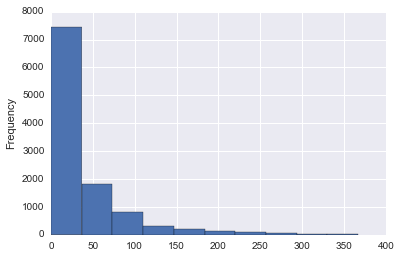

In [12]:
timeseries['casual'].plot(kind='hist')

In [13]:
timeseries['log_count'] = np.log1p(timeseries['count'])
timeseries['log_registered'] = np.log1p(timeseries['registered'])
timeseries['log_casual'] = np.log1p(timeseries['casual'])

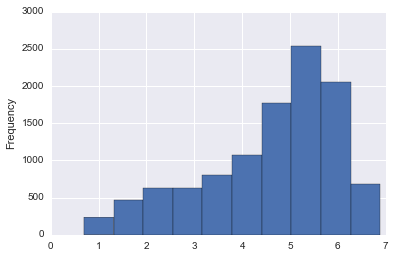

In [14]:
timeseries['log_count'].plot(kind='hist')

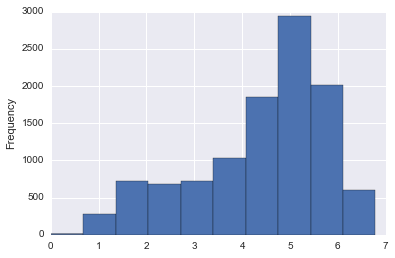

In [15]:
timeseries['log_registered'].plot(kind='hist')

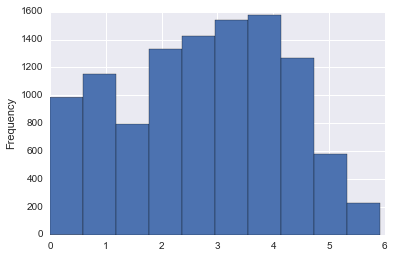

In [16]:
timeseries['log_casual'].plot(kind='hist')

Given features frequency

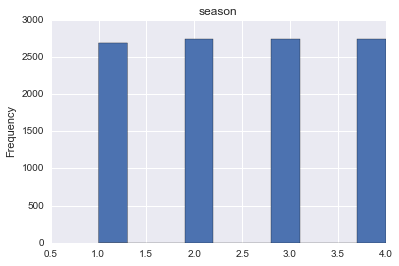

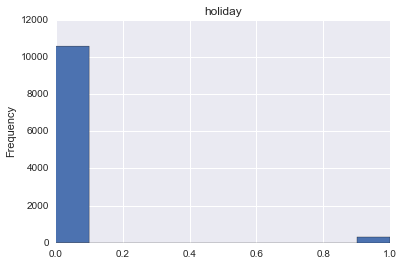

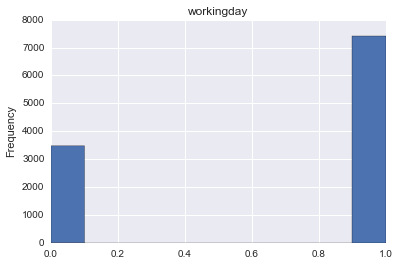

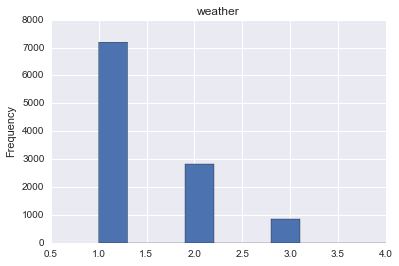

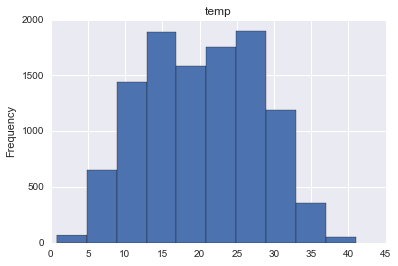

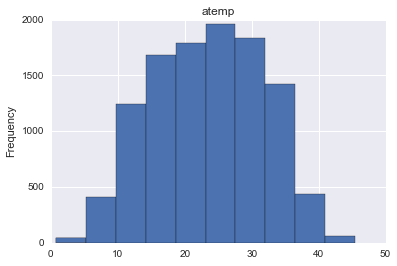

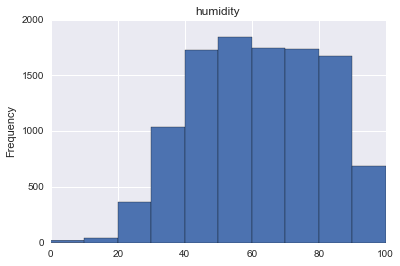

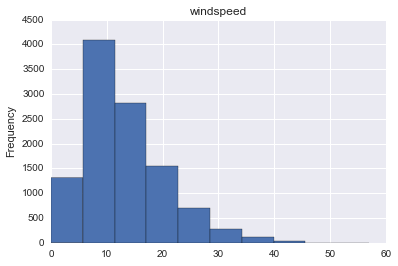

In [17]:
features = ['season', u'holiday', u'workingday', u'weather', u'temp', u'atemp',
            u'humidity', u'windspeed']
for f in features:
    plt.figure()
    plt.title(f)
    timeseries[f].plot(kind='hist')
    plt.show()

# General trend

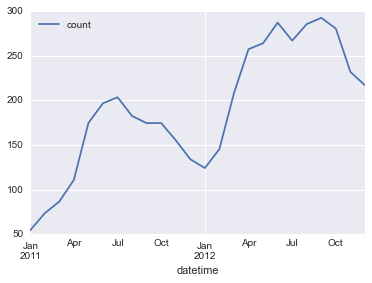

In [18]:
timeseries.resample('M', how='mean')[['count']].plot()

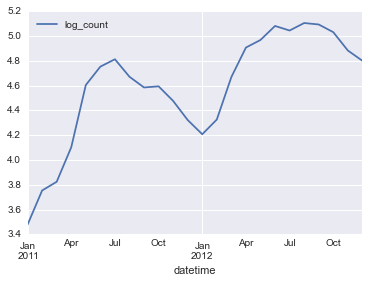

In [19]:
timeseries.resample('M', how='mean')[['log_count']].plot()

In [20]:
from datetime import date
def calculate_period(timestamp):
    initial_date = date(2011, 1, 1)
    current_date = timestamp.date()
    return (current_date.year - initial_date.year) * 12 + (current_date.month - initial_date.month)

In [21]:
monthly_mean = timeseries.resample('M', how='mean')
monthly_mean['period'] = monthly_mean.index.map(calculate_period)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


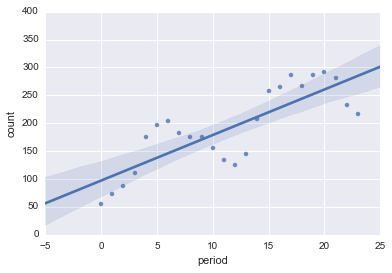

In [22]:
sns.regplot(x="period", y="count", data=monthly_mean)

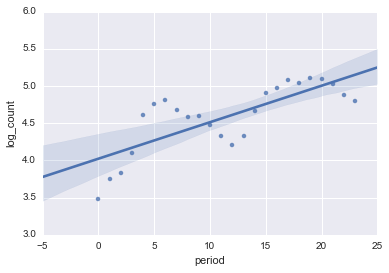

In [23]:
sns.regplot(x="period", y="log_count", data=monthly_mean)

# Month / Hour trend

In [54]:
timeseries['month'] = timeseries.index.map(lambda ts: ts.date().month)
timeseries['hour'] = timeseries.index.map(lambda ts: ts.hour)
timeseries['year'] = timeseries.index.map(lambda ts: ts.date().year)

In [55]:
grouped = timeseries.groupby(['month', 'hour']).mean()['count']

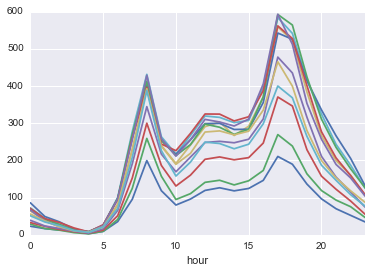

In [56]:
for i in range(1, 13):
    grouped[i].plot()
plt.show()

Split into months

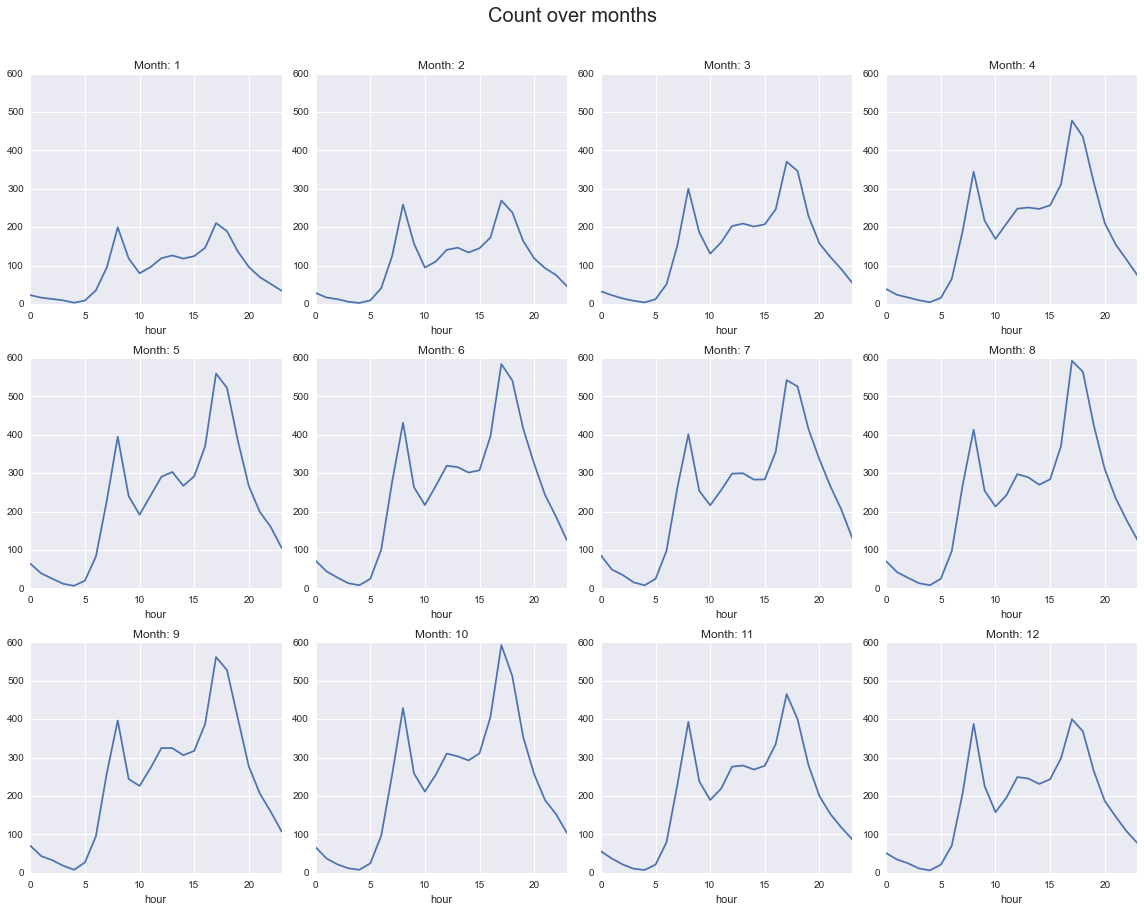

In [57]:
fig = plt.figure(figsize=(16, 12))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.ylim(0, 600)
    grouped[i].plot()
    plt.title('Month: {}'.format(i))
plt.suptitle('Count over months', size=20, y=1.05)
fig.tight_layout()
plt.show()

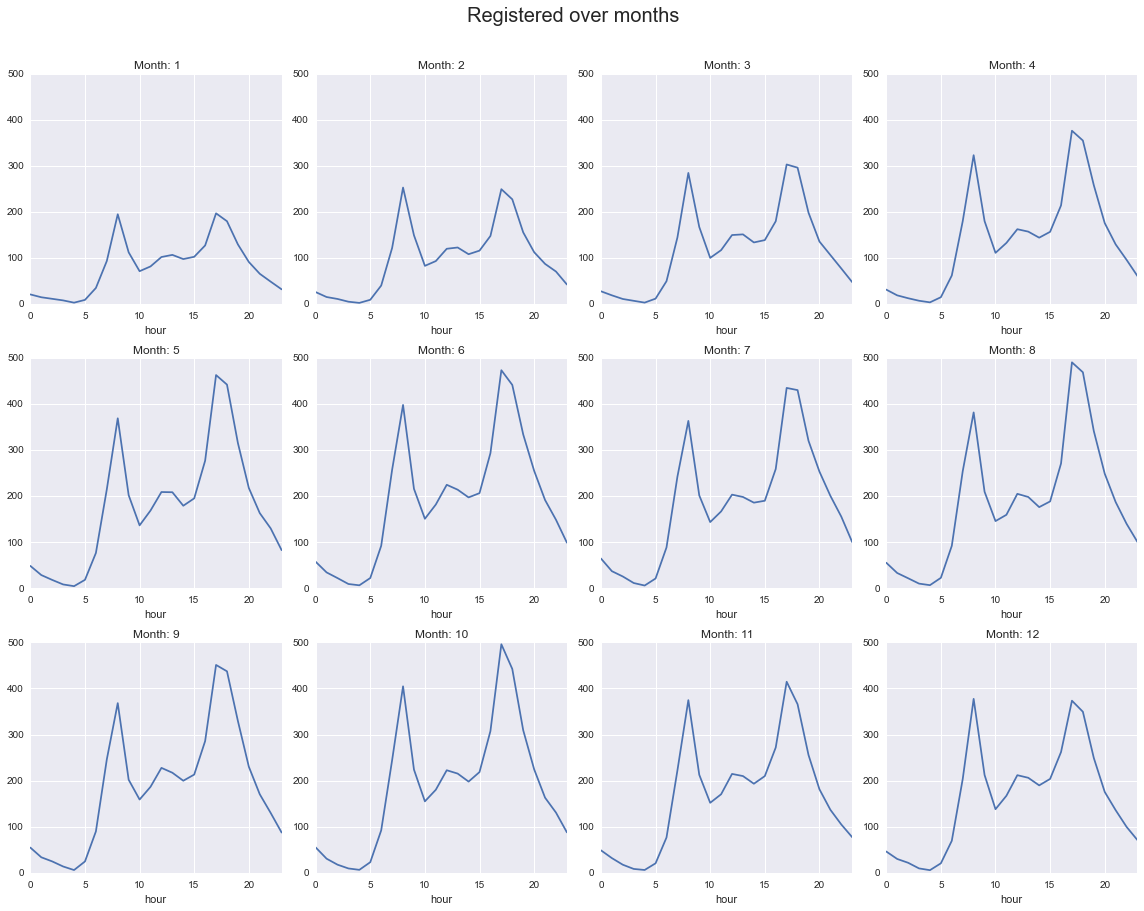

In [58]:
grouped = timeseries.groupby(['month', 'hour']).mean()['registered']
fig = plt.figure(figsize=(16, 12))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.ylim(0, 500)
    grouped[i].plot()
    plt.title('Month: {}'.format(i))
plt.suptitle('Registered over months', size=20, y=1.05)
fig.tight_layout()
plt.show()

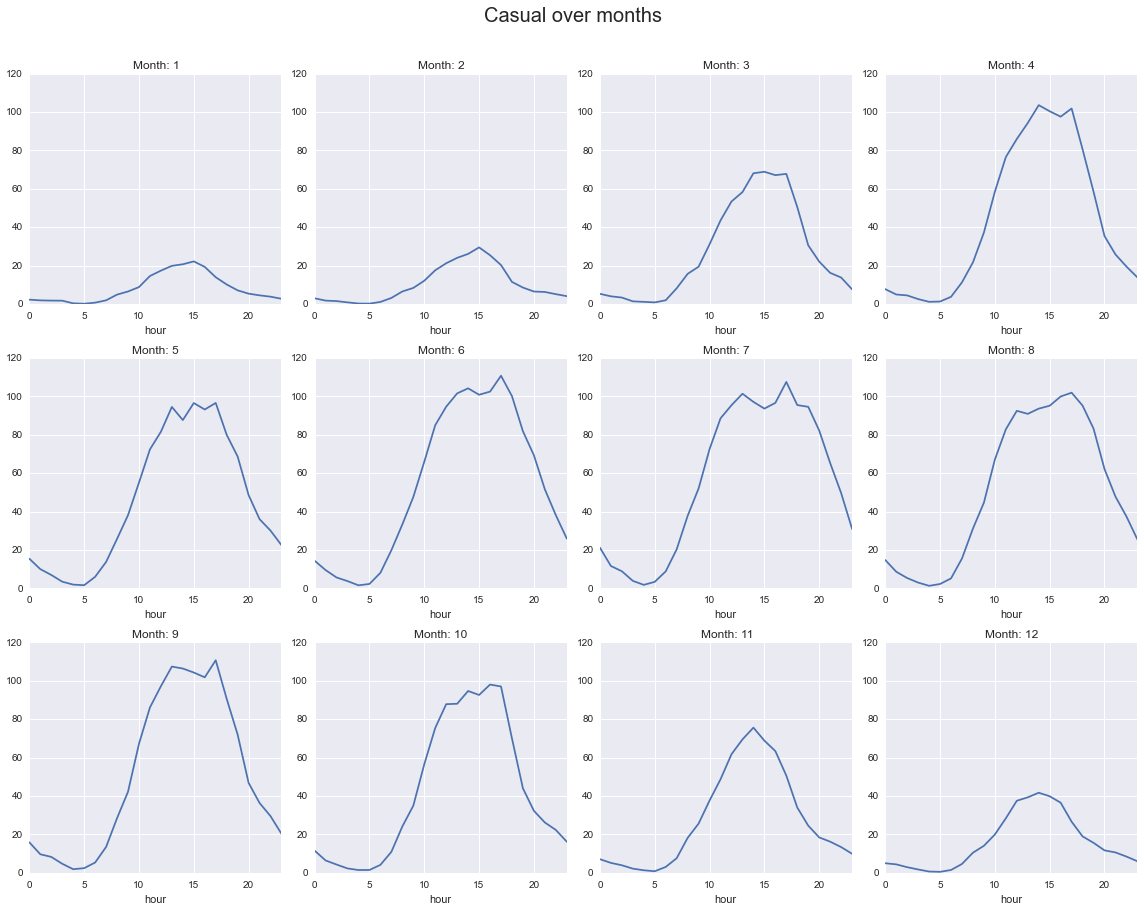

In [59]:
grouped = timeseries.groupby(['month', 'hour']).mean()['casual']
fig = plt.figure(figsize=(16, 12))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.ylim(0, 120)
    grouped[i].plot()
    plt.title('Month: {}'.format(i))
plt.suptitle('Casual over months', size=20, y=1.05)
fig.tight_layout()
plt.show()

Same but log scaled

In [60]:
grouped = timeseries.groupby(['month', 'hour']).mean()['log_count']

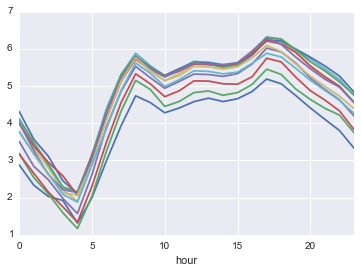

In [61]:
for i in range(1, 13):
    grouped[i].plot()
plt.show()

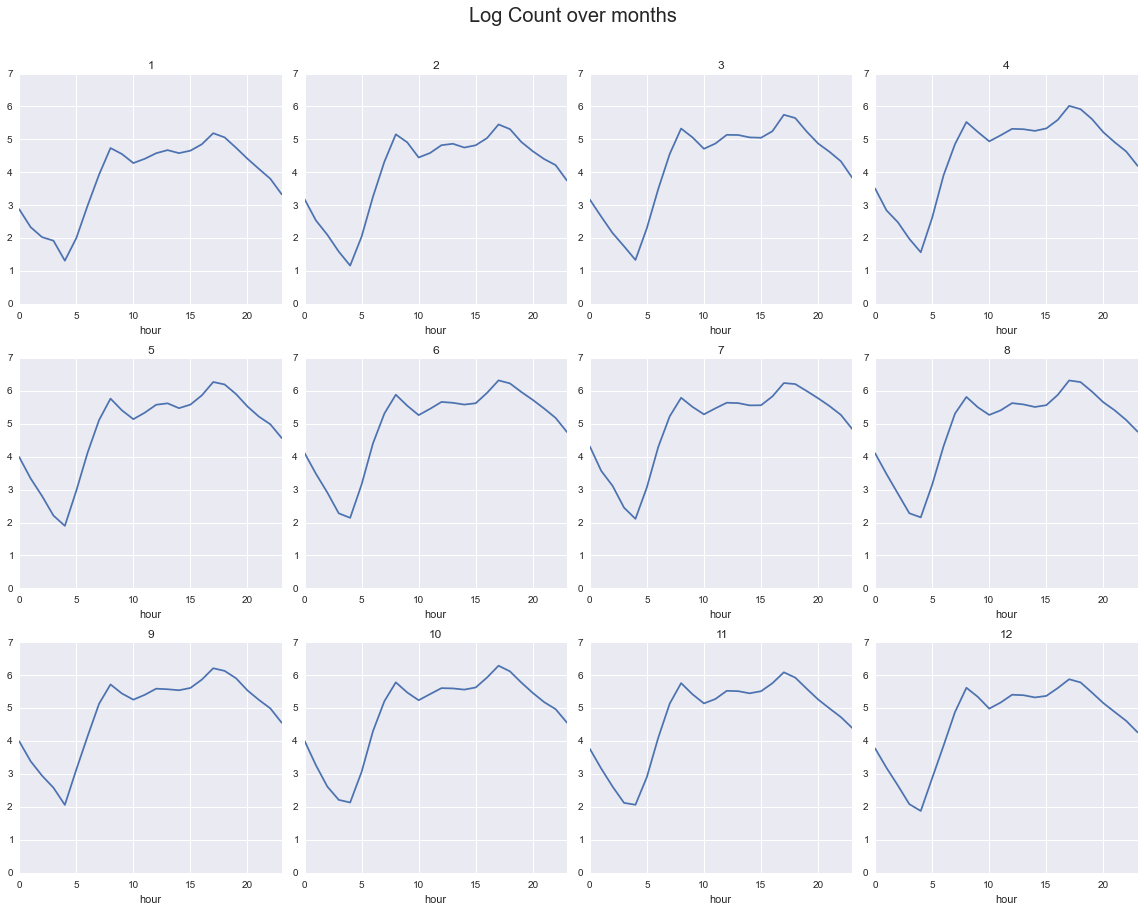

In [62]:
fig = plt.figure(figsize=(16, 12))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.ylim(0, 7)    
    grouped[i].plot()
    plt.title(i)
plt.suptitle('Log Count over months', size=20, y=1.05)
fig.tight_layout()
plt.show()

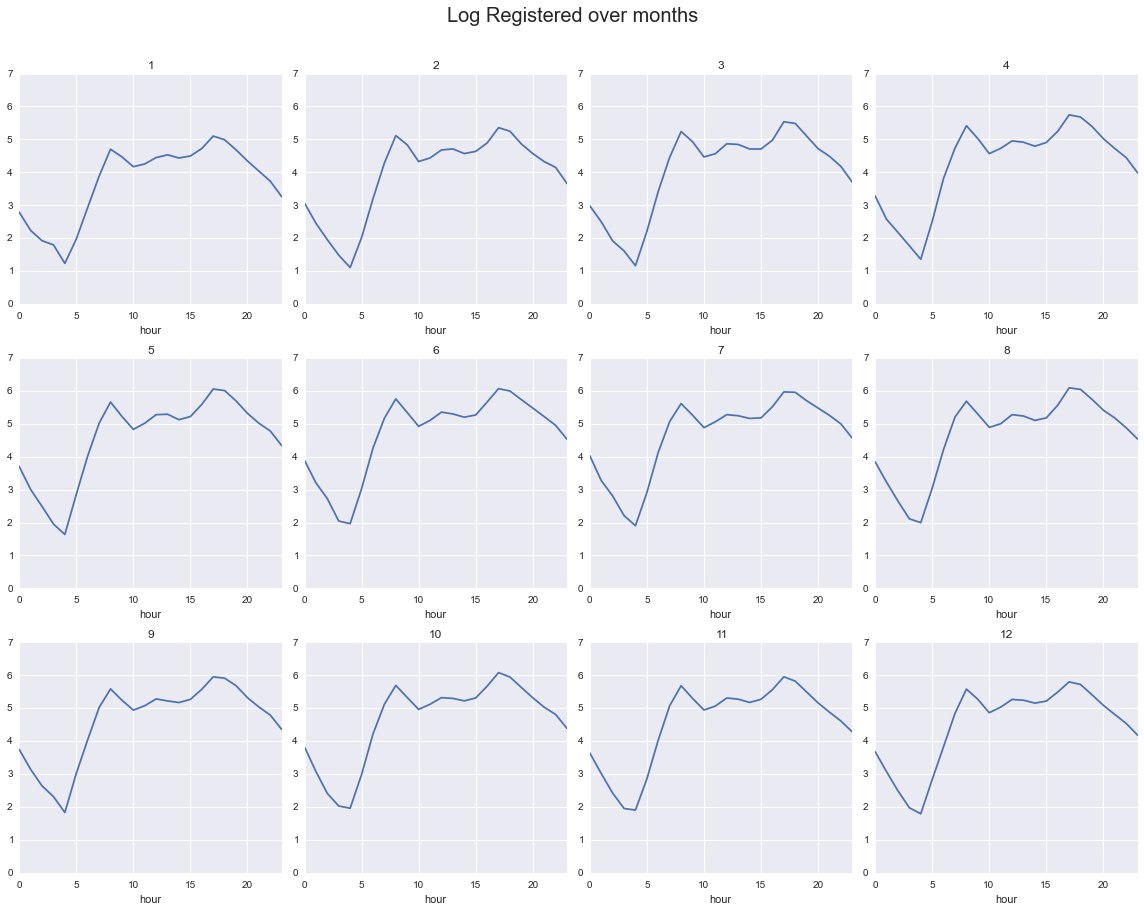

In [63]:
grouped = timeseries.groupby(['month', 'hour']).mean()['log_registered']
fig = plt.figure(figsize=(16, 12))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.ylim(0, 7)    
    grouped[i].plot()
    plt.title(i)
plt.suptitle('Log Registered over months', size=20, y=1.05)
fig.tight_layout()
plt.show()

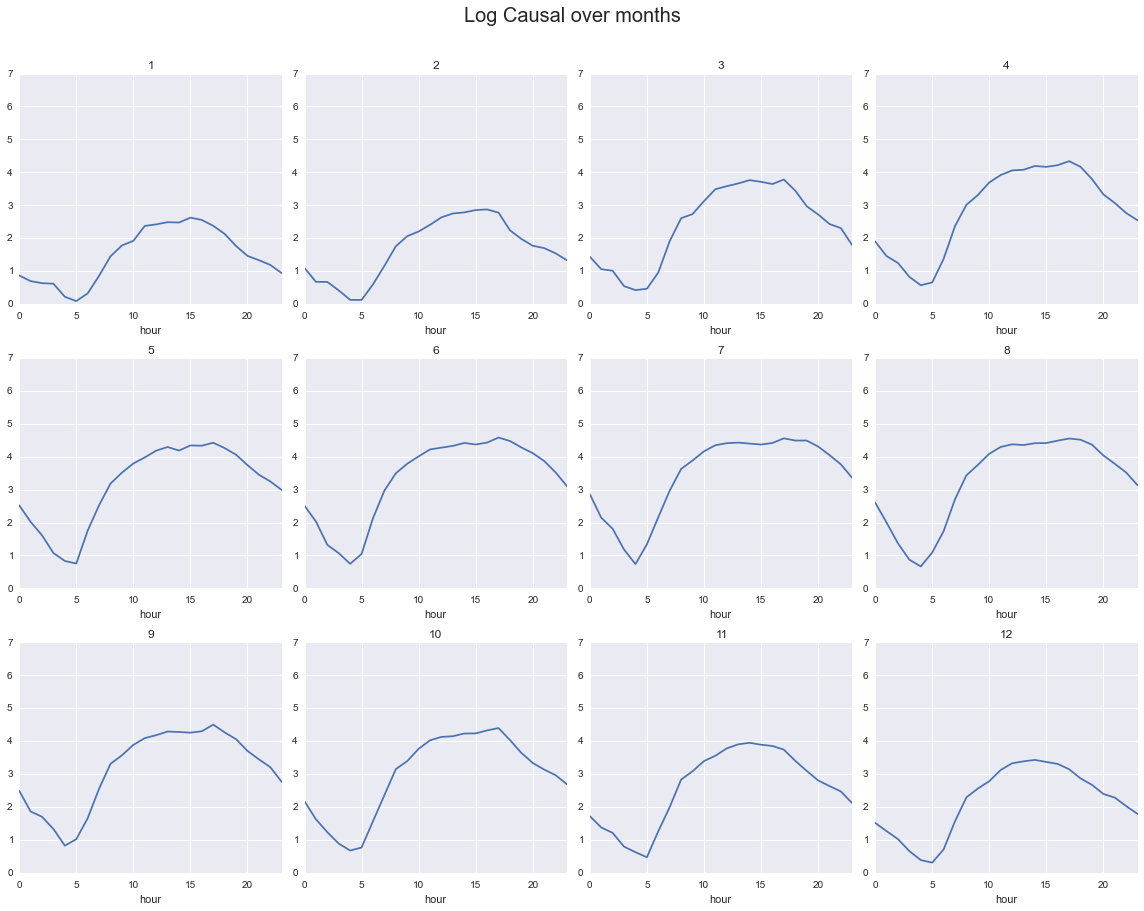

In [64]:
grouped = timeseries.groupby(['month', 'hour']).mean()['log_casual']
fig = plt.figure(figsize=(16, 12))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    plt.ylim(0, 7)    
    grouped[i].plot()
    plt.title(i)
plt.suptitle('Log Causal over months', size=20, y=1.05)
fig.tight_layout()
plt.show()

All features mean over time

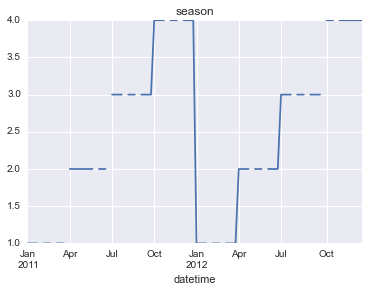

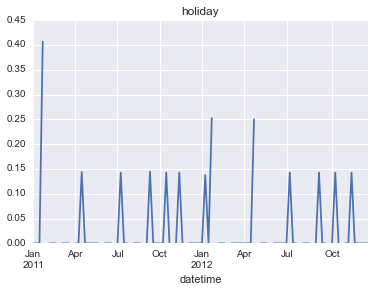

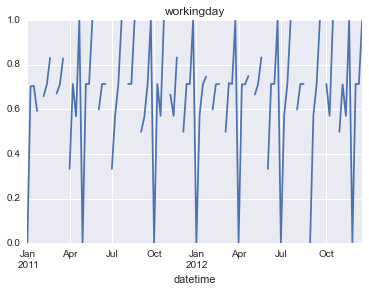

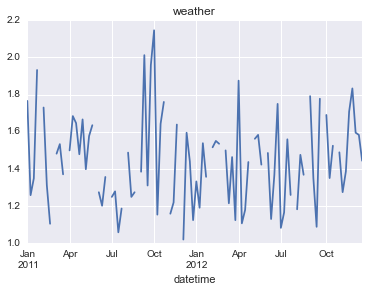

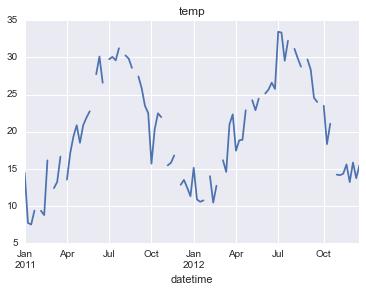

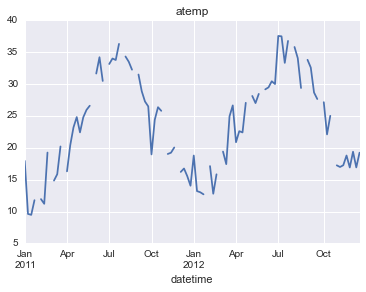

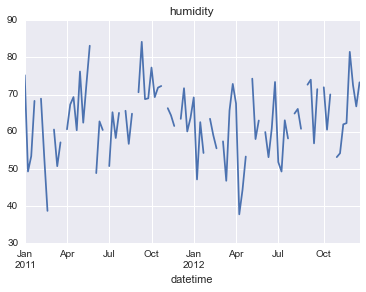

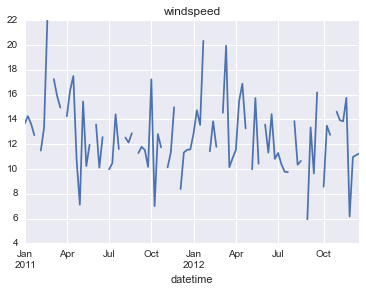

In [65]:
features = ['season', u'holiday', u'workingday', u'weather', u'temp', u'atemp',
            u'humidity', u'windspeed']
for f in features:
    plt.figure()
    plt.title(f)
    timeseries.resample('W', how='mean')[f].plot()
    plt.show()